# Introduction

The following is a test of the algorithm found in a popular GPL licensed algorithm called **The Flame Draves Algorithm** found here:

http://www.flam3.com/flame_draves.pdf

This algorithm is used to generate fractal frames in a beautiful way.

Testing the plotting mechanism


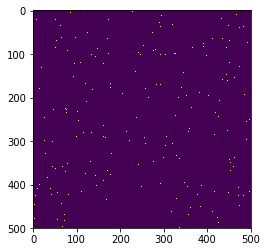

In [70]:
# Test and create a way to plot a numpy matrix or 2D array
import random
import math
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


def plot_matrix(mat):
    fig, ax = plt.subplots()
    h = ax.imshow(mat)
    plt.show()

def plot_points(mat, img_size=(500,500)):
    # This should take a matrix of shape (M, 2) where
    # M is the number of points. 
    # The values in mat could be anything, but gaurentee some shape
    # Therefore this function dictates the size of the image in pixels
    # TODO: zoom to remove low density areas
    mat = np.array(mat).T
    x_max, x_min = mat[0].max(), mat[0].min()
    y_max, y_min = mat[1].max(), mat[1].min()
    x_rng, y_rng = x_max - x_min, y_max - y_min
    mul_factor_x = (img_size[0]-1)/x_rng
    mul_factor_y = (img_size[1]-1)/y_rng
    img = np.zeros(img_size)
    for x, y in mat.T:
        img[int((x - x_min)*mul_factor_x),int((y - y_min)*mul_factor_y)] = 1
    plot_matrix(img)
    

M = 1000
hl = np.random.random(size=(M, 2))

# Test this
print("Testing the plotting mechanism")
plot_points(hl)

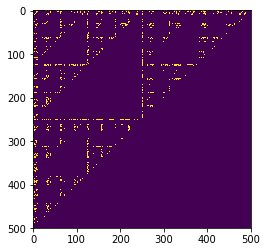

In [71]:
# Making sierpinski's gasket
def sierpinski(N=500, iters=10000):
    def F0(x,y):
        return (x/2, y/2)

    def F1(x,y):
        return ((x+1)/2, y/2)

    def F2(x,y):
        return (x/2, (y+1)/2)

    F_array = (F0, F1, F2)    
    
    x, y = (random.randint(0,N-1), random.randint(0,N-1))
    mat = []
    for i in range(iters):
        ri = random.randint(0,2)
        x, y = F_array[ri](x, y)
        if i < 20:
            continue
        mat.append([int(x*300),int(y*300)])
    return mat
        
        
chaos = sierpinski()
plot_points(chaos)

In [72]:
# Basic variations in the implementation of the flam3
def r2(x, y):
    return (x*x) + (y*y)

def r(x, y):
    return r2(x,y)**0.5

def v0(x, y):
    # Linear
    return (x,y)

def v1(x, y):
    # Sinusoidal
    return (math.sin(x), math.sin(y))

def v2(x, y):
    # Spherical
    r2_calced = r2(x,y)
    return (x/r2_calced, y/r2_calced)

def v3(x, y):
    # Swirl
    r2_calced = r2(x,y)
    sin_r2 = np.sin(r2_calced)
    cos_r2 = np.cos(r2_calced)
    return np.array([x*sin_r2 - y*cos_r2, x*cos_r2 + y*sin_r2]).T

def v4(x, y):
    # Horseshoe
    x = np.array(x)
    y = np.array(y)
    return np.array([(x-y)*(x+y)/r(x,y), 2*x*y]).T

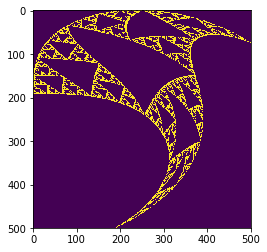

In [77]:
# Making sierpinski's gasket
def sierpinski(N=500, iters=60000):
    def F0(x,y):
        return (x/2, y/2)

    def F1(x,y):
        return ((x+1)/2, y/2)

    def F2(x,y):
        return (x/2, (y+1)/2)

    F_array = (F0, F1, F2)    
    
    x, y = (1,1)
    mat = []
    for i in range(iters):
        ri = random.randint(0,2)
        x, y = F_array[ri](x, y)
        if i < 1000:
            continue
        
        x1, y1 = x, y
        x1, y1 = v3(x*1.1, y*1.1) # Increase for more swirl!
        mat.append([x1,y1])
    return mat
        
        
chaos = sierpinski()
plot_points(chaos)

In [65]:
chaos

[[-0.04707166244194378, 0.00051981056801276258],
 [-0.04853572528032607, 0.00032209125171341611],
 [-0.024237551305894573, 0.025133442359595814],
 [-0.012075589865806487, 0.037570789139927119],
 [-0.031042275648902537, 0.018816889301739914],
 [-0.01553042836124773, 0.0093931009272895313],
 [-0.032761598070407072, 0.0047298916811557576],
 [-0.016382736947002402, 0.0023514837838935288],
 [-0.0081720013661955391, 0.02617965206213374],
 [-0.0040933842238806608, 0.013087518966616866],
 [-0.0020164040799197716, 0.031545405003780426],
 [-0.026009345656557957, 0.015795778487273433],
 [-0.013010154732331559, 0.0078888556658187683],
 [-0.0065057621139824199, 0.0039432983383334737],
 [-0.0032529666351470317, 0.0019715079730572571],
 [-0.0016088813851936929, 0.025986827091128858],
 [-0.00075838173557990301, 0.037994000037806973],
 [-0.00032145312944168721, 0.043997137338534817],
 [-9.9498663292734514e-05, 0.046998550742283825],
 [-8.8679443576646032e-05, 0.023499160706736806],
 [-1.196558009245798